#Importando as bibliotecas necessárias


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Carregando a base de dados
## Fonte : https://www.kaggle.com/datasets/fidelissauro/inflacao-brasil

In [4]:
data = pd.read_csv('inflacao.csv')
data.head()

,referencia,ano,mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses,consolidado_ano
0,1980-01,1980,1,6.62,6.62,0.0,6.56,6.56,0.00,False
1,1980-02,1980,2,4.62,11.54,0.0,4.15,10.98,0.00,False
2,1980-03,1980,3,6.04,18.27,0.0,5.12,16.67,75.11,False
3,1980-04,1980,4,5.29,24.53,0.0,4.85,22.33,77.48,False
4,1980-05,1980,5,5.70,31.63,0.0,5.53,29.10,84.06,False


#Fazendo análise básica do conjunto de dados

In [10]:
print(data.columns)
print(data.dtypes)
data.shape

Index(['referencia', 'ano', 'mes', 'ipca_variacao', 'ipca_acumulado_ano',
       'ipca_acumulado_doze_meses', 'inpc_variacao', 'inpc_acumulado_ano',
       'inpc_acumulado_doze_meses', 'consolidado_ano'],
      dtype='object')
referencia                    object
ano                            int64
mes                            int64
ipca_variacao                float64
ipca_acumulado_ano           float64
ipca_acumulado_doze_meses    float64
inpc_variacao                float64
inpc_acumulado_ano           float64
inpc_acumulado_doze_meses    float64
consolidado_ano                 bool
dtype: object


(515, 10)

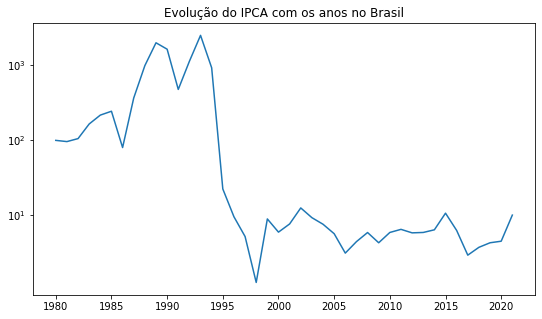

In [201]:
dados_ano = data[data.consolidado_ano == True]
plt.figure(figsize=(9,5))
plt.yscale('symlog')
plt.title("Evolução do IPCA com os anos no Brasil")
plt.xticks(ticks=dados_ano.ano.loc[::5])
plt.plot(dados_ano.ano,dados_ano.ipca_acumulado_ano)


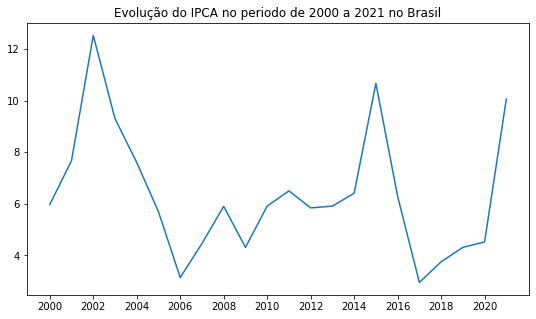

In [215]:
#Analisando o periodo de 2000 a 2021
mask = dados_ano[dados_ano.ano >= 2000]
plt.figure(figsize=(9,5))
plt.title("Evolução do IPCA no periodo de 2000 a 2021 no Brasil")
plt.xticks(ticks=dados_ano.ano.loc[::2])
plt.plot(mask.ano,mask.ipca_acumulado_ano)

In [161]:
#Medidas de centralidade e dispersao
medidas = data.groupby('ano').ipca_acumulado_ano.agg(['min','max','mean','median','std'])
medidas.sample(10)

,min,max,mean,median,std
ano,,,,,
2005,0.58,5.69,3.270833,3.300,1.565006
2020,-0.16,4.52,1.144167,0.495,1.432229
2002,0.52,12.53,4.582500,3.555,3.741026
1991,20.75,472.70,166.535833,117.305,138.897283
1980,6.62,99.25,46.033333,42.455,29.913682
1990,67.55,1620.97,760.945000,694.065,458.448801
2010,0.75,5.91,3.213333,3.095,1.461471
1997,1.18,5.22,3.612500,4.190,1.296177
2011,0.83,6.50,3.920833,3.955,1.704686


#Inflação em 2020


In [185]:
inflacao_2020 = data[data.ano == 2020]
inflacao_2020

,referencia,ano,mes,ipca_variacao,ipca_acumulado_ano,ipca_acumulado_doze_meses,inpc_variacao,inpc_acumulado_ano,inpc_acumulado_doze_meses,consolidado_ano
480,2020-01,2020,1,0.21,0.21,4.19,0.19,0.19,4.30,False
481,2020-02,2020,2,0.25,0.46,4.01,0.17,0.36,3.92,False
482,2020-03,2020,3,0.07,0.53,3.30,0.18,0.54,3.31,False
483,2020-04,2020,4,-0.31,0.22,2.40,-0.23,0.31,2.46,False
484,2020-05,2020,5,-0.38,-0.16,1.88,-0.25,0.06,2.05,False
485,2020-06,2020,6,0.26,0.10,2.13,0.30,0.36,2.35,False
486,2020-07,2020,7,0.36,0.46,2.31,0.44,0.80,2.69,False
487,2020-08,2020,8,0.24,0.70,2.44,0.36,1.16,2.94,False
488,2020-09,2020,9,0.64,1.34,3.14,0.87,2.04,3.89,False
489,2020-10,2020,10,0.86,2.22,3.92,0.89,2.95,4.77,False


Text(0.5, 1.0, 'Variação do IPCA durante o ano de 2020')

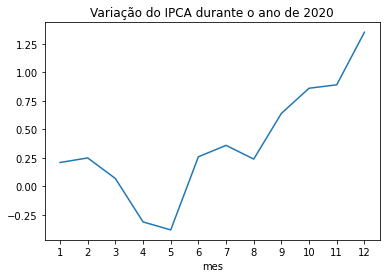

In [187]:
#Medidas de inflação em 2020
mask = inflacao_2020.set_index('mes')
mask['ipca_variacao'].plot()
plt.xticks(ticks=inflacao_2020.mes)
plt.title("Variação do IPCA durante o ano de 2020")

In [194]:
mask[['inpc_acumulado_ano','ipca_variacao']].agg(['max','min','mean','std']).transpose()

,max,min,mean,std
inpc_acumulado_ano,5.45,0.06,1.5125,1.738124
ipca_variacao,1.35,-0.38,0.3700,0.497978


#Quais anos tiveram a maior inflação e quais tiveram a menor?

In [247]:
vals = dados_ano.set_index('ano').ipca_acumulado_ano.sort_values()
min = vals[0:1]
max = vals[-1:]
print(f"Ano com menor inflação : {min.index[0]}, ano com maior inflação : {max.index[0]}")

Ano com menor inflação : 1998, ano com maior inflação : 1993
